In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ranksums  # Wilcoxon rank sum test
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import os

def select_files(prompt):
    """Prompt the user to select multiple files using a GUI."""
    root = tk.Tk()
    root.attributes('-topmost', True)
    root.withdraw()
    print(prompt)
    return filedialog.askopenfilenames(title=prompt)

def detect_valid_data_start(file_path):
    """Detect the start of valid data in the BORIS file."""
    try:
        with open(file_path, 'r') as f:
            lines = f.readlines()
        for idx, line in enumerate(lines):
            if 'Time' in line and 'Behavior' in line:
                return idx
        print(f"No valid header found in file: {file_path}")
        return None
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return None

def load_boris_data(file_path):
    """Load and preprocess BORIS behavior data."""
    start_line = detect_valid_data_start(file_path)
    if start_line is None:
        print(f"Skipping file {file_path} due to missing valid header.")
        return None
    try:
        boris_data = pd.read_csv(file_path, skiprows=start_line)
        # 確認可能的行為欄位名稱
        behavior_columns = [col for col in boris_data.columns if 'Behavior' in col or 'Event' in col]
        if not behavior_columns:
            print(f"No behavior-related column found in file: {file_path}")
            return None
        # 使用第一個找到的行為欄位
        behavior_column = behavior_columns[0]
        behavior_counts = boris_data[behavior_column].value_counts()
        return behavior_counts
    except Exception as e:
        print(f"Error loading BORIS file {file_path}: {e}")
        return None

def process_group(files):
    """Process a group of files, returning behavior statistics for each session."""
    grouped_data = {}
    for file in files:
        filename = os.path.basename(file)
        try:
            mouse_id, session, trial = filename.split('_')[:3]
            key = f"{session}_{trial.split('.')[0]}"
        except ValueError:
            print(f"Invalid file naming format: {filename}")
            continue

        if key not in grouped_data:
            grouped_data[key] = []
        data = load_boris_data(file)
        if data is not None:
            grouped_data[key].append(data.sum())  # Sum of all behavior occurrences

    results = {}
    for key, values in grouped_data.items():
        if len(values) == 0:
            print(f"No valid data for session {key}. Skipping.")
            continue
        mean_value = np.mean(values)
        sem_value = np.std(values, ddof=1) / np.sqrt(len(values))
        results[key] = (mean_value, sem_value)
    return results

def perform_statistical_analysis(control_data, experiment_data, sessions):
    """Perform Wilcoxon rank sum tests and return p-values."""
    control_means = [control_data[session][0] for session in sessions]
    experiment_means = [experiment_data.get(session, (np.nan, np.nan))[0] for session in sessions]
    p_values = []
    for ctrl, exp in zip(control_means, experiment_means):
        if not np.isnan(exp):
            _, p = ranksums([ctrl], [exp])
            p_values.append(p)
        else:
            p_values.append(np.nan)
    return p_values, control_means, experiment_means

def plot_behavior_comparison(sessions, control_means, control_sems, experiment_means, experiment_sems, p_values):
    """Plot behavior comparison with error bars and significance annotations."""
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.35
    x = np.arange(len(sessions))

    ax.bar(x - bar_width / 2, control_means, bar_width, yerr=control_sems, label="Control", capsize=5, color='dimgray', linewidth=2)
    ax.bar(x + bar_width / 2, experiment_means, bar_width, yerr=experiment_sems, label="Experiment", capsize=5, color='Orange', linewidth=2)

    for i, p in enumerate(p_values):
        if not np.isnan(p) and p < 0.05:
            ax.text(x[i], max(control_means[i] + control_sems[i], experiment_means[i] + experiment_sems[i]) + 0.5,
                    '*', ha='center', fontsize=12)

    ax.set_xlabel("Session_Trial")
    ax.set_ylabel("Behavior Count")
    ax.set_title("Behavior Comparison: Control vs Experiment")
    ax.set_xticks(x)
    ax.set_xticklabels(sessions, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()


"""Main function to orchestrate the analysis."""
control_files = select_files("Select Control Group Files")
experiment_files = select_files("Select Experiment Group Files")






Select Control Group Files
Select Experiment Group Files


d:\miniforge3\envs\basic\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
d:\miniforge3\envs\basic\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


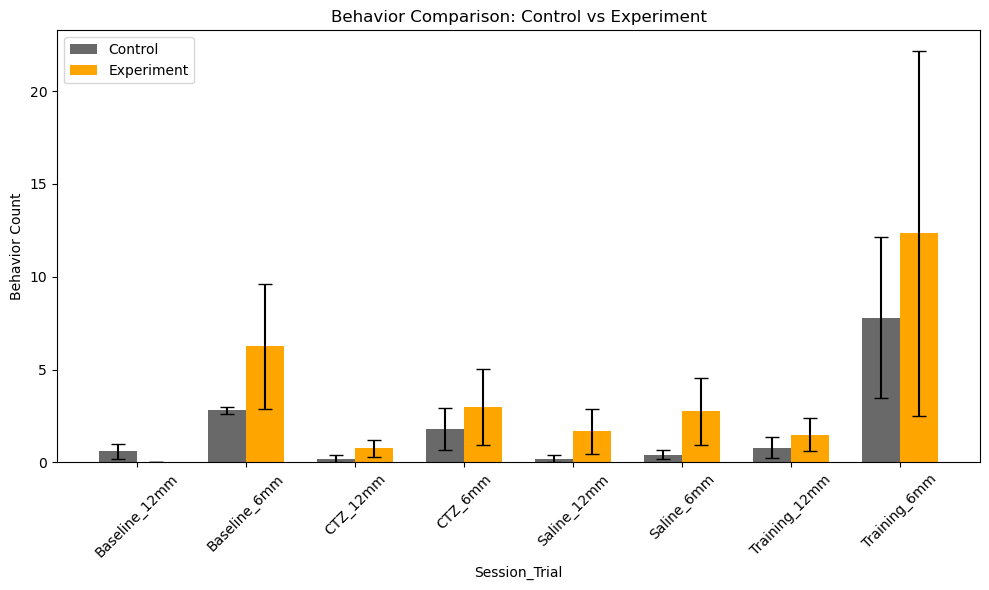

In [6]:
control_data = process_group(control_files)
experiment_data = process_group(experiment_files)

sessions = sorted(control_data.keys())
control_sems = [control_data[session][1] for session in sessions]
experiment_sems = [experiment_data.get(session, (np.nan, np.nan))[1] for session in sessions]

p_values, control_means, experiment_means = perform_statistical_analysis(control_data, experiment_data, sessions)
plot_behavior_comparison(sessions, control_means, control_sems, experiment_means, experiment_sems, p_values)

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import ranksums  # Wilcoxon rank sum test
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import os

def select_files(prompt):
    """Prompt the user to select multiple files using a GUI."""
    root = tk.Tk()
    root.attributes('-topmost', True)
    root.withdraw()
    print(prompt)
    return filedialog.askopenfilenames(title=prompt)

def detect_valid_data_start(file_path):
    """Detect the start of valid data in the BORIS file."""
    try:
        with open(file_path, 'r') as f:
            lines = f.readlines()
        for idx, line in enumerate(lines):
            if 'Time' in line and 'Behavior' in line:
                return idx
        print(f"No valid header found in file: {file_path}")
        return None
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return None

def load_boris_data(file_path):
    """Load and preprocess BORIS behavior data."""
    start_line = detect_valid_data_start(file_path)
    if start_line is None:
        print(f"Skipping file {file_path} due to missing valid header.")
        return None
    try:
        boris_data = pd.read_csv(file_path, skiprows=start_line)
        # 確認可能的行為欄位名稱
        behavior_columns = [col for col in boris_data.columns if 'Behavior' in col or 'Event' in col]
        if not behavior_columns:
            print(f"No behavior-related column found in file: {file_path}")
            return None
        # 使用第一個找到的行為欄位
        behavior_column = behavior_columns[0]
        behavior_counts = boris_data[behavior_column].value_counts()/3
        return behavior_counts
    except Exception as e:
        print(f"Error loading BORIS file {file_path}: {e}")
        return None

def process_group(files):
    """Process a group of files, returning behavior statistics for each session."""
    grouped_data = {}
    summary_data = []

    for file in files:
        filename = os.path.basename(file)
        try:
            mouse_id, session, trial = filename.split('_')[:3]
            key = f"{session}_{trial.split('.')[0]}"
        except ValueError:
            print(f"Invalid file naming format: {filename}")
            continue

        if key not in grouped_data:
            grouped_data[key] = []
        data = load_boris_data(file)
        if data is not None:
            grouped_data[key].append(data.sum())  # Sum of all behavior occurrences
            summary_data.append({
                'Filename': filename,
                'MouseID': mouse_id,
                'Session': session,
                'Trial': trial.split('.')[0],
                **data.to_dict()
            })  # Collect individual file data with grouping info

    results = {}
    for key, values in grouped_data.items():
        if len(values) == 0:
            print(f"No valid data for session {key}. Skipping.")
            continue
        mean_value = np.mean(values)
        sem_value = np.std(values, ddof=1) / np.sqrt(len(values))
        results[key] = (mean_value, sem_value)
    return results, summary_data

def perform_statistical_analysis(control_data, experiment_data, sessions):
    """Perform Wilcoxon rank sum tests and return p-values."""
    control_means = [control_data[session][0] for session in sessions]
    experiment_means = [experiment_data.get(session, (np.nan, np.nan))[0] for session in sessions]
    p_values = []
    for ctrl, exp in zip(control_means, experiment_means):
        if not np.isnan(exp):
            _, p = ranksums([ctrl], [exp])
            p_values.append(p)
        else:
            p_values.append(np.nan)
    return p_values, control_means, experiment_means

def plot_behavior_comparison(sessions, control_means, control_sems, experiment_means, experiment_sems, p_values):
    """Plot behavior comparison with error bars and significance annotations."""
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.35
    x = np.arange(len(sessions))

    # 設置條形圖顏色
    control_color = 'dimgray'  # 更深的灰色
    experiment_color = 'orange'

    ax.bar(x - bar_width / 2, control_means, bar_width, yerr=control_sems, label="Control", capsize=5, color=control_color, linewidth=2)
    ax.bar(x + bar_width / 2, experiment_means, bar_width, yerr=experiment_sems, label="Experiment", capsize=5, color=experiment_color, linewidth=2)

    for i, p in enumerate(p_values):
        if not np.isnan(p) and p < 0.05:
            ax.text(x[i], max(control_means[i] + control_sems[i], experiment_means[i] + experiment_sems[i]) + 0.5,
                    '*', ha='center', fontsize=12)

    ax.set_xlabel("Session_Trial")
    ax.set_ylabel("Behavior Count")
    ax.set_title("Behavior Comparison: Control vs Experiment")
    ax.set_xticks(x)
    ax.set_xticklabels(sessions, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()

def save_summary_to_csv(summary_data, output_file):
    """Save the summary data to a CSV file."""
    summary_df = pd.DataFrame(summary_data).fillna(0)  # 將空缺值補上0
    summary_df.to_csv(output_file, index=False)
    print(f"Summary data saved to {output_file}")

In [ ]:
"""Main function to orchestrate the analysis."""
control_files = select_files("Select Control Group Files")
experiment_files = select_files("Select Experiment Group Files")

d:\miniforge3\envs\basic\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
d:\miniforge3\envs\basic\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


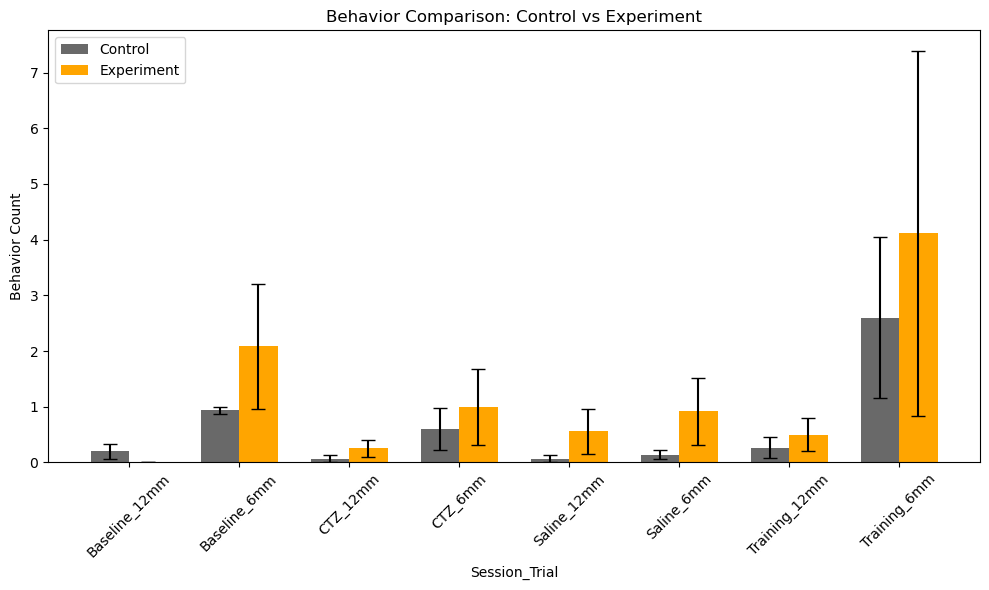

Summary data saved to control_behavior_summary.csv
Summary data saved to experiment_behavior_summary.csv


In [18]:
control_data, control_summary = process_group(control_files)
experiment_data, experiment_summary = process_group(experiment_files)

sessions = sorted(control_data.keys())
control_sems = [control_data[session][1] for session in sessions]
experiment_sems = [experiment_data.get(session, (np.nan, np.nan))[1] for session in sessions]

p_values, control_means, experiment_means = perform_statistical_analysis(control_data, experiment_data, sessions)
plot_behavior_comparison(sessions, control_means, control_sems, experiment_means, experiment_sems, p_values)

# Save summary data to separate CSV files for control and experiment groups
save_summary_to_csv(control_summary, "control_behavior_summary.csv")
save_summary_to_csv(experiment_summary, "experiment_behavior_summary.csv")

In [8]:
#Video Length
import pandas as pd
import numpy as np
from scipy.stats import ranksums  # Wilcoxon rank sum test
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import os
from moviepy.editor import VideoFileClip  # 用於取得影片長度

def select_files(prompt):
    """Prompt the user to select multiple files using a GUI."""
    root = tk.Tk()
    root.attributes('-topmost', True)
    root.withdraw()
    print(prompt)
    return filedialog.askopenfilenames(title=prompt)

def get_video_length(video_path):
    """取得影片長度（秒）"""
    try:
        clip = VideoFileClip(video_path)
        duration = clip.duration  # 長度 (秒)
        clip.close()
        return duration
    except Exception as e:
        print(f"無法讀取影片 {video_path}: {e}")
        return None

def detect_valid_data_start(file_path):
    """Detect the start of valid data in the BORIS file."""
    try:
        with open(file_path, 'r') as f:
            lines = f.readlines()
        for idx, line in enumerate(lines):
            if 'Time' in line and 'Behavior' in line:
                return idx
        print(f"No valid header found in file: {file_path}")
        return None
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return None

def load_boris_data(file_path):
    """Load and preprocess BORIS behavior data."""
    start_line = detect_valid_data_start(file_path)
    if start_line is None:
        print(f"Skipping file {file_path} due to missing valid header.")
        return None
    try:
        boris_data = pd.read_csv(file_path, skiprows=start_line)
        return boris_data
    except Exception as e:
        print(f"Error loading BORIS file {file_path}: {e}")
        return None

def process_group(files):
    """Process a group of files, returning behavior statistics and video lengths."""
    summary_data = []

    for file in files:
        filename = os.path.basename(file)
        video_length = get_video_length(file)  # 取得影片長度
        summary_data.append({
            'Filename': filename,
            'Video Length (s)': video_length
        })  # 記錄影片長度

    return summary_data

def save_summary_to_csv(summary_data, output_file):
    """Save the summary data to a CSV file."""
    summary_df = pd.DataFrame(summary_data).fillna(0)  # 將空缺值補上0
    summary_df.to_csv(output_file, index=False)
    print(f"Summary data saved to {output_file}")

# Main function to orchestrate the analysis
control_files = select_files("Select Control Group Files")
experiment_files = select_files("Select Experiment Group Files")

# Process control and experiment files
control_summary = process_group(control_files)
experiment_summary = process_group(experiment_files)

# save to CSV (control_summary / experiment分開)
save_summary_to_csv(control_summary, "control_video_length_summary.csv")
save_summary_to_csv(experiment_summary, "experiment_video_length_summary.csv")


Select Control Group Files
Select Experiment Group Files
Summary data saved to control_video_length_summary.csv
Summary data saved to experiment_video_length_summary.csv


In [ ]:
#讀取control_video_length_summary.csv，並依照影片名稱內的資訊，將相同小鼠ID的影片長度取平均後重新輸出
import pandas as pd

# 讀取 CSV 檔案
df_ctl = pd.read_csv('control_video_length_summary.csv')
df_exp = pd.read_csv('experiment_video_length_summary.csv')

# 取得小鼠 ID
df_ctl['MouseID'] = df_ctl['Filename'].str.split('_').str[0]
df_exp['MouseID'] = df_exp['Filename'].str.split('_').str[0]

# 依照小鼠 ID 分組，計算平均影片長度
df_ctl_avg = df_ctl.groupby('MouseID')['Video Length (s)'].mean().reset_index()
df_exp_avg = df_exp.groupby('MouseID')['Video Length (s)'].mean().reset_index()

# 輸出結果
df_ctl_avg.to_csv('control_video_length_avg.csv', index=False)
df_exp_avg.to_csv('experiment_video_length_avg.csv', index=False)


